Voting
===

***

In [1]:
from random import randint
from collections import Counter
from matplotlib import pyplot as plt
from tqdm import tqdm  #Делает load-бары


def classif(n):  # С помощью n можем регулировать точность модели
    rez = randint(1, 100)
    if rez <= n:
        return 1
    else:
        return 2

    
def voting(prob, voice):
    count = 0
    for i in range(10000):
        ans = Counter([classif(prob) for i in range(voice)]).most_common()[0][0]
        if ans == 1:
            count += 1
    return (count / 10000)

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:16<00:00,  1.70it/s]


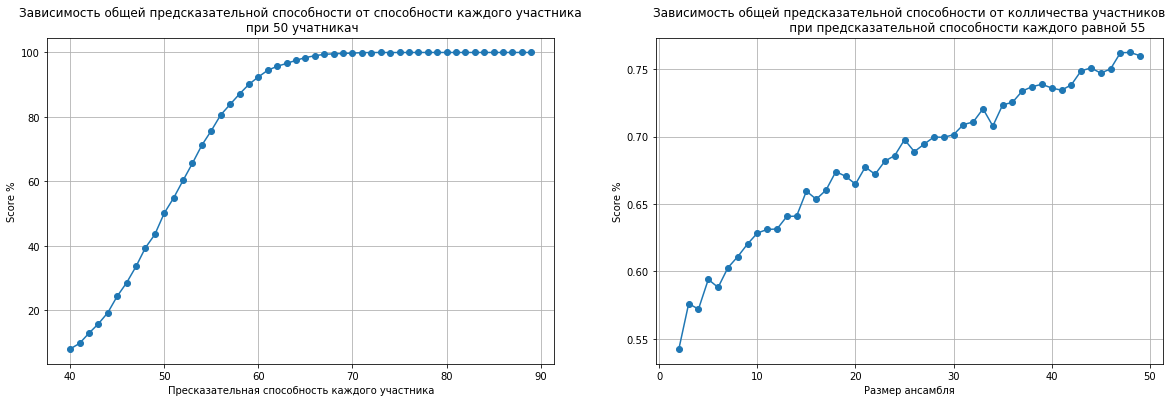

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

score_prob = []
for prob in tqdm(range(40, 90)):
    score_prob.append(voting(prob, 50) * 100)

score_voice = []
for voice in tqdm(range(2, 50)):
    score_voice.append(voting(55, voice))

axes[0].plot(range(40, 90), score_prob, marker='o')
axes[0].set_xlabel('Пресказательная способность каждого участника')
axes[0].set_ylabel('Score %')
axes[0].set_title('Зависимость общей предсказательной способности от способности каждого участника\n при 50 учатникач')
axes[0].grid(True)

axes[1].plot(range(2,50), score_voice, marker='o')
axes[1].set_xlabel('Размер ансамбля')
axes[1].set_ylabel('Score %')
axes[1].set_title("""Зависимость общей предсказательной способности от колличества участников
                              при предсказательной способности каждого равной 55""")
axes[1].grid(True)

***

GradientBoosting
===

Допустим у нас есть матрица признаков, а каждая строка наблюдений называется Xi.
Также есть матрица(размерностью Nx1) ответов(labels) Y.  Каждое значение Yi
и семейство деревьев построеное последовательно друг за другом, каждое следующее дерево закрывает ошибки предыдущих.
***

Дерево принятия решения примем за функцию b() входным параметром которой является строка признаков Xi.
Тогда ответом первого дерева будет являться b1(X1), а ответы всех остальных деревьев будут распределяться следующим образом:
***

**Ответы**|*y1*|*y2*|...|*yl*
---|---|---|---|---
**Прогнозы**|b1(x1)|b2(x2)|...|bl(xl)
**Прогнозы**|y1 - b1(x1)|y2 - b2(x2)|...|yl - bl(xl)
**Прогнозы**|y1 - (b1(x1) + y1 - b1(x1))  |  y2 - (b2(x2) - y2 - b2(x2))  |...|  yl - (bl(xl) + yl - bl(xl))

***

Конечный ответ ансабля деревьев GradientBoosting равен сувме ответов
***

In [3]:
from sklearn.ensemble import GradientBoostingClassifier as GBC, GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestClassifier as RFC, RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR

In [4]:
from sklearn.datasets import load_boston, load_wine
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
X_boston, Y_boston = load_boston().data, load_boston().target
X_wine, Y_wine = load_wine().data, load_wine().target

In [5]:
xb_train, xb_test, yb_train, yb_test = train_test_split(X_boston, Y_boston)
xb_train, xb_test, yb_train, yb_test = train_test_split(X_wine, Y_wine)

In [18]:
%%time
# GBC vs RFC
trees = [1] + list(range(5, 85, 5))
scoreGC = []
scoreRC = []
for Counbt in trees:
    modelGC = GBC(n_estimators=Counbt, max_depth=5, learning_rate=0.01)
    scoreGC.append(cross_validate(estimator=modelGC, X=X_wine, y=Y_wine, scoring='accuracy', cv=5)) #cv разбивает данные на 5
    modelRC = RFC(n_estimators=Counbt, max_depth=5)
    scoreRC.append(cross_validate(estimator=modelRC, X=X_wine, y=Y_wine, scoring='accuracy', cv=5))
    
scoreGC = np.asmatrix([i['test_score'] for i in scoreGC])
scoreRC = np.asmatrix([i['test_score'] for i in scoreRC])

Wall time: 8.42 s


In [15]:
# scoreGC = np.asmatrix([i['test_score'] for i in scoreGC])
# scoreRC = np.asmatrix([i['test_score'] for i in scoreRC])

In [11]:
%%time
# GBR vs RFR
trees = [1] + list(range(5, 85, 5))
scoreGR = []
scoreRR = []
for Counbt in trees:
    modelGR = GBR(n_estimators=Counbt, max_depth=5, learning_rate=0.1) #learning_rate насколько сильно закрывает ошибку
    scoreGR.append(cross_validate(estimator=modelGR, X=X_boston, y=Y_boston, cv=5))
    modelRR = RFR(n_estimators=Counbt, max_depth=5)
    scoreRR.append(cross_validate(estimator=modelRR, X=X_boston, y=Y_boston, cv=5))
    
scoreGR = np.asmatrix([i['test_score'] for i in scoreGR])
scoreRR = np.asmatrix([i['test_score'] for i in scoreRR])

# Изучить как влияет score_rate and enostimators

Wall time: 6.98 s


In [9]:
# scoreGR = np.asmatrix([i['test_score'] for i in scoreGR])
# scoreRR = np.asmatrix([i['test_score'] for i in scoreRR])

NameError: name 'scoreGR' is not defined

NameError: name 'trees' is not defined

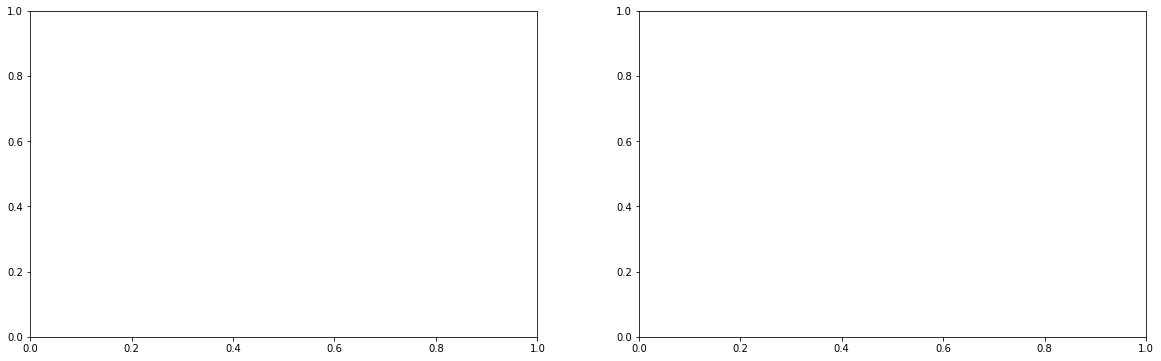

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

line1C, = axes[0].plot(trees, scoreGC.mean(axis=1), marker='o', label='GBC')
line2C, = axes[0].plot(trees, scoreRC.mean(axis=1), marker='o', label='RFC')

axes[0].legend(handles=[line1C, line2C])
axes[0].grid(True)
axes[0].set_xlabel('count trees')
axes[0].set_ylabel('score')
axes[0].set_title('GBC vs RFC')


line1R, = axes[1].plot(trees, scoreGR.mean(axis=1), marker='o', label='GBR')
line2R, = axes[1].plot(trees, scoreRR.mean(axis=1), marker='o', label='RFR')

axes[1].legend(handles=[line1R, line2R])
axes[1].grid(True)
axes[1].set_xlabel('count trees')
axes[1].set_ylabel('score')
axes[1].set_title('GBR vs RFR')
plt.show()

In [ ]:
def plot_feature_importances(title, feature_names, axes, model):
    n_features = len(feature_names)
    axes.barh(range(n_features), model.feature_importances_, align='center')
    axes.set_title(title)
    axes.set_yticklabels( feature_names)
    axes.set_xlabel("Важность признака")

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

modelGC.fit(X_wine, Y_wine)
modelGR.fit(X_boston, Y_boston)

modelRC.fit(X_wine, Y_wine)
modelRR.fit(X_boston, Y_boston)

plot_feature_importances('GBC', load_wine().feature_names, axes[0][0], modelGC)
plot_feature_importances('GBR', load_boston().feature_names, axes[0][1], modelGR)

plot_feature_importances('RFC', load_wine().feature_names, axes[1][0], modelRC)
plot_feature_importances('RFR', load_boston().feature_names, axes[1][1], modelRR)

KNeighbors
===

In [20]:
import mglearn

C:\Users\Windows10x64\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


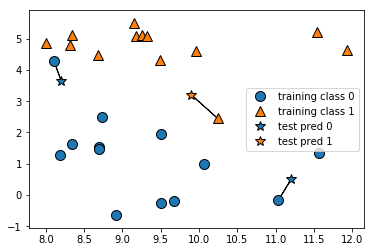

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\Windows10x64\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


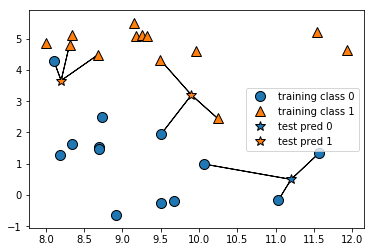

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Users\Windows10x64\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


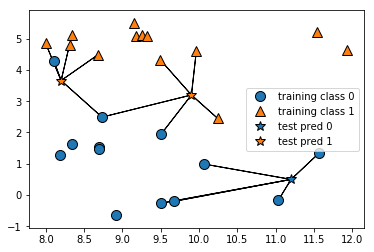

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=5)


In [24]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\Windows10x64\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


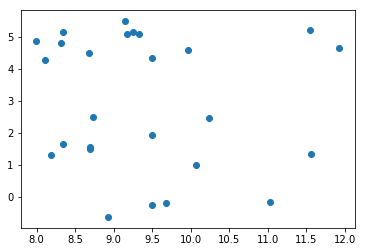

In [25]:
plt.scatter(X[:,0], X[:,1])

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [27]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Правильность на тестовом наборе: 0.86


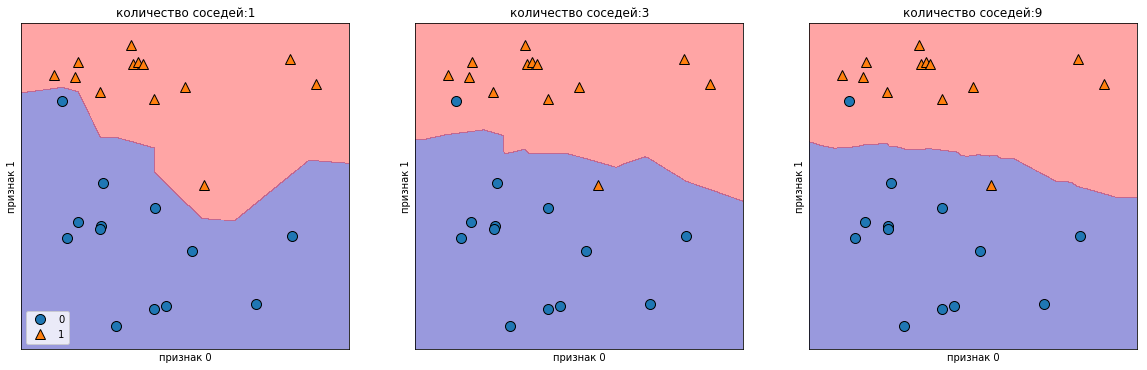

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # создаем объект-классификатор и подгоняем в одной строке
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("количество соседей:{}".format(n_neighbors))
    ax.set_xlabel("признак 0")
    ax.set_ylabel("признак 1")
    axes[0].legend(loc=3)

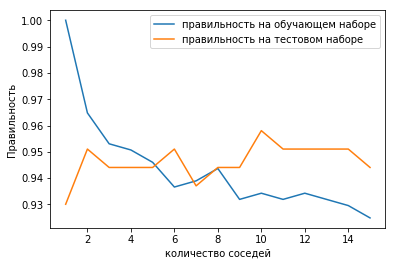

In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 16)                               # пробуем n_neighbors от 1 до 15
for n_neighbors in neighbors_settings:
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)         # строим модель
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))       # записываем правильность на обучающем наборе
    
    test_accuracy.append(clf.score(X_test, y_test))             # записываем правильность на тестовом наборе
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend();

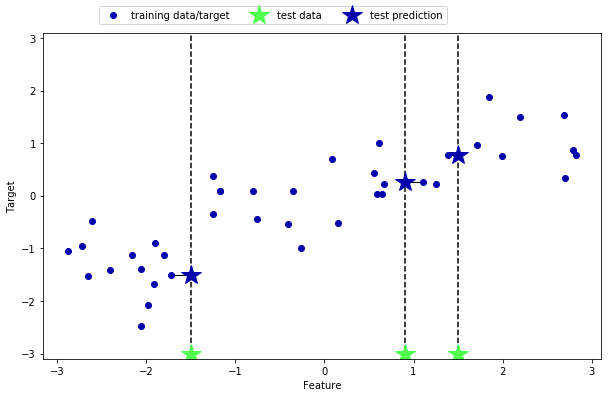

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

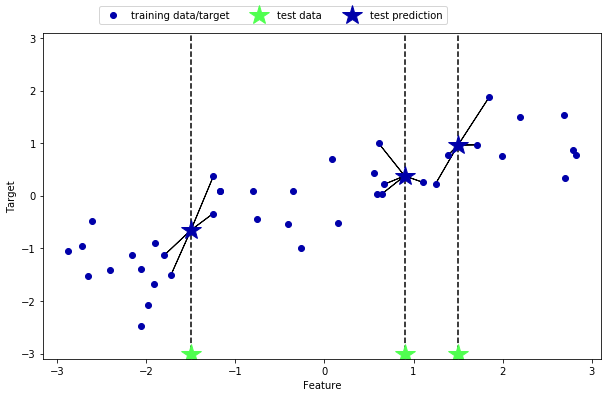

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=4)

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train,y_test = train_test_split(load_boston().data, load_boston().target)

In [35]:
model = KNeighborsRegressor()

In [36]:
model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [37]:
print(f"средне квадратичное отклонение {model.score(x_test,y_test)}")

средне квадратичное отклонение 0.46659985071201926


In [38]:
X, y = mglearn.datasets.make_wave()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

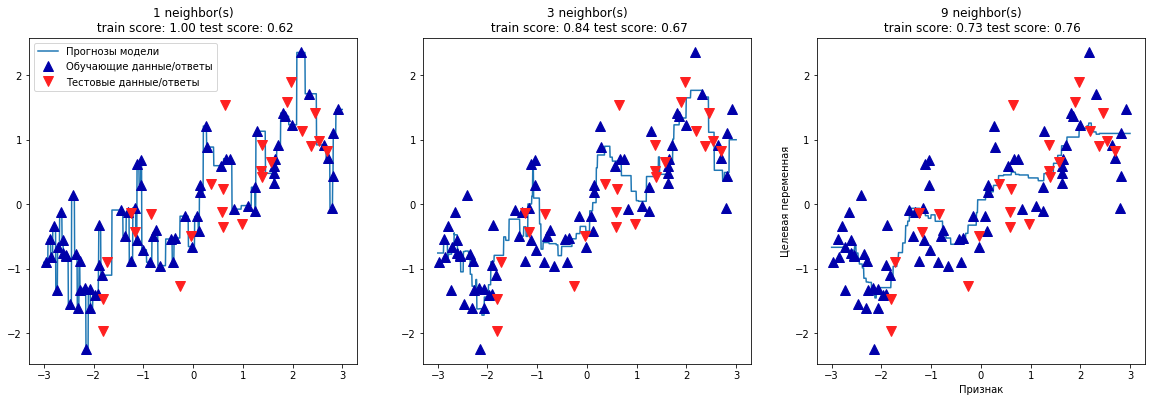

In [39]:
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # получаем прогнозы, используя 1, 3, и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=10)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=10)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))
ax.set_xlabel("Признак")
ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы","Тестовые данные/ответы"], loc="best")

CODE
===

In [40]:
from collections import Counter
from sklearn.model_selection import train_test_split
def raw_majority_vote(labels):####################################
    votes = Counter(labels)
    winner,_ = votes.most_common(1)[0]
    return winner

In [41]:
def majority_vote(labels):
    """labels отсортированый по расстоянию до самой точки"""
    vote_counts = Counter(labels)
    winner, winner_counter = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_counter])
    if num_winners == 1:
        return winner #единственный
    else:
        return majority_vote(labels[:-1])

In [42]:
from scipy.spatial import distance
def knn_classify(k, points, labels, new_point):
    """(point, flag)"""
    labeled_points = list(zip(points,labels))
    by_distance = sorted(labeled_points, key=lambda point: distance.euclidean(point[0], new_point))
    k_nearest_labels = [label for _, label in by_distance[:k]]
    return majority_vote(k_nearest_labels)

In [43]:
from sklearn.datasets import load_iris
x,y = load_iris().data, load_iris().target

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [45]:
for x_, y_ in zip(x_test, y_test):
    predict = knn_classify(5,x_train,y_train,x_)
    print(f'predict is - {predict}  label is - {y_}  {predict == y_}')

predict is - 2  label is - 2  True
predict is - 0  label is - 0  True
predict is - 1  label is - 1  True
predict is - 1  label is - 2  False
predict is - 1  label is - 1  True
predict is - 2  label is - 2  True
predict is - 1  label is - 1  True
predict is - 0  label is - 0  True
predict is - 1  label is - 1  True
predict is - 2  label is - 2  True
predict is - 2  label is - 2  True
predict is - 2  label is - 2  True
predict is - 1  label is - 1  True
predict is - 1  label is - 1  True
predict is - 2  label is - 2  True
predict is - 0  label is - 0  True
predict is - 0  label is - 0  True
predict is - 0  label is - 0  True
predict is - 0  label is - 0  True
predict is - 0  label is - 0  True
predict is - 2  label is - 2  True
predict is - 2  label is - 2  True
predict is - 1  label is - 1  True
predict is - 2  label is - 2  True
predict is - 2  label is - 2  True
predict is - 0  label is - 0  True
predict is - 0  label is - 0  True
predict is - 0  label is - 0  True
predict is - 2  lab

In [ ]:
# Следующее занятие логистическая регрессия